Import the `config.json` file for which you would like to run simulations, and the `SimulationEnvironment` class
<details>
<summary><b>Show config.json</b></summary>

```json
{
    "simulation_year": 2006,
    "environment": {
        "latitude": 18.53,
        "longitude": 73.85,
        "timezone": "Asia/Kolkata"
    },
    "solar_collector": {
        "f_r_tao_alpha": 0.675,
        "f_r_u_l": 5.656,
        "tilt": 33
    },
    "load_profile": {
        "litres_per_day": 4500,
        "water_density": 998,
        "specific_heat_water": 4180,
        "desired_temperature": 60,
        "consumption_pattern": [
            {
                "start": "06:00",
                "end": "08:00"
            },
            {
                "start": "10:00",
                "end": "11:00"
            },
            {
                "start": "12:00",
                "end": "13:00"
            },
            {
                "start": "14:00",
                "end": "18:00"
            }
        ]
    },
    "storage_tank": {
        "type": "Cylindrical",
        "height_to_diameter_ratio": 1,
        "wall_material": "Mild steel",
        "storage_wall_thicknes": 0.006,
        "thermal_conductivity_wall": 50,
        "insulation_material": "Glass wool",
        "insulation_thickness": 0.2,
        "insulation_thermal_conductivity": 0.04
    }
}
```
</details>

In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

CONFIG_FILE = f'{EXAMPLE_DIR}/config_india.json'
from models import SimulationEnvironment

We will start the simulation with the solar collector area $A_c = 50$ and the Volume of the storage tank $V_{st} = 5$

In [2]:
AREA = 50
VOLUME = 5
simulation = SimulationEnvironment(AREA, VOLUME, CONFIG_FILE)

Visualizing the Water consumption pattern defined in the provided `config.json`

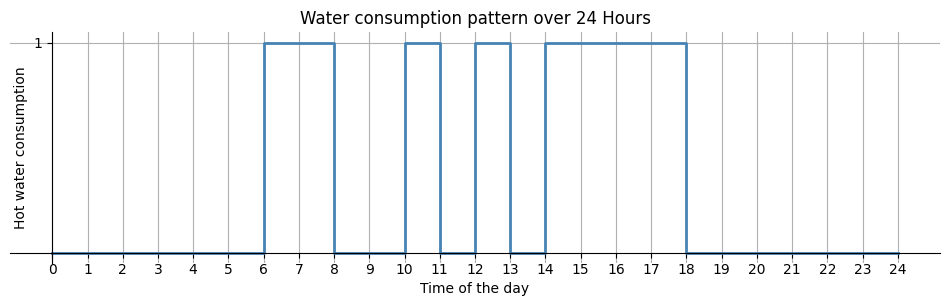

In [3]:
simulation.plot_water_consumption()

Run simulation for for a single day, for the desired `month` and `day` 

Total energy consumed: 473.463 MJ
Auxiliary energy consumed: 0.000 MJ
The solar fraction (F) is: 1.000


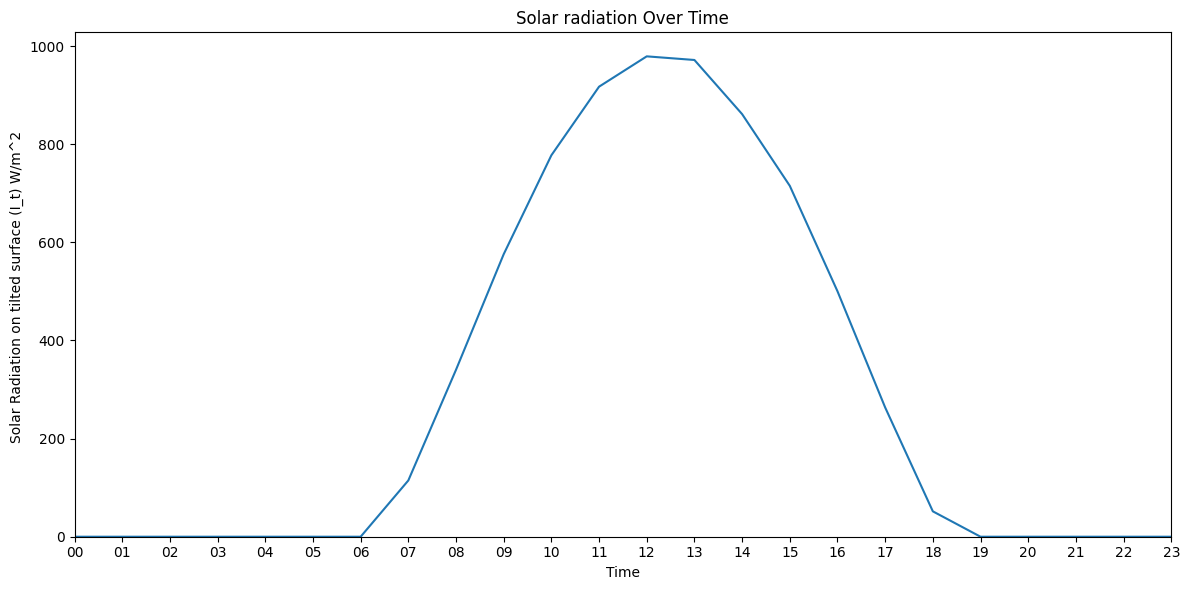

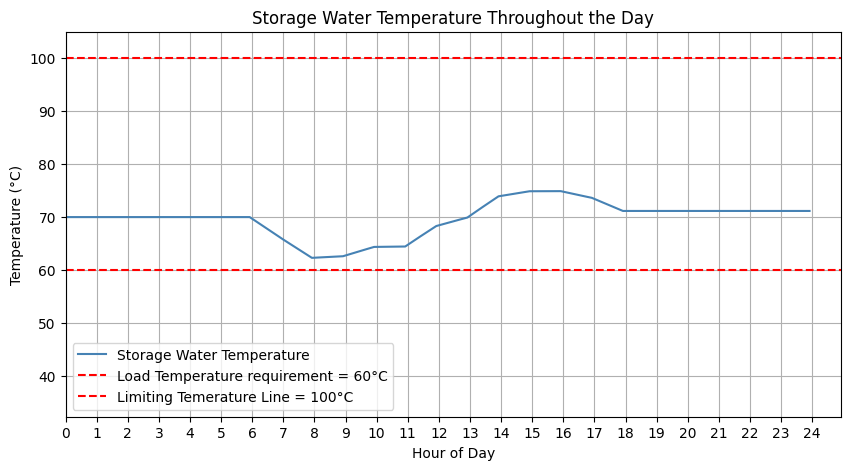

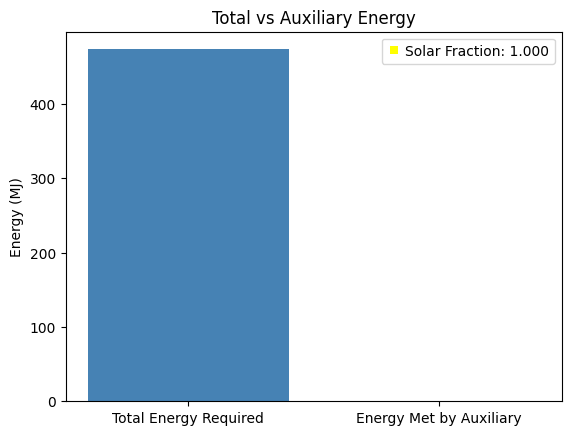

In [4]:
simulation.simulate_single_day(month=4, day=15)

Run simulation for the desired `month`

Total energy consumed: 20.090 GJ
Auxiliary energy consumed: 2.012 GJ
The solar fraction (F) is: 0.900


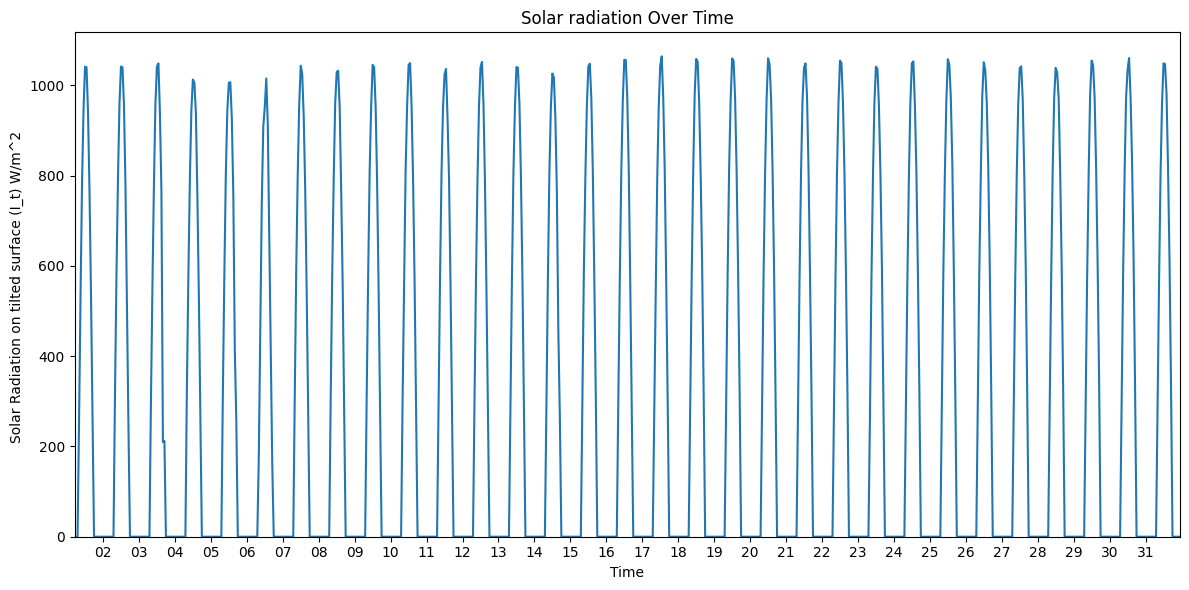

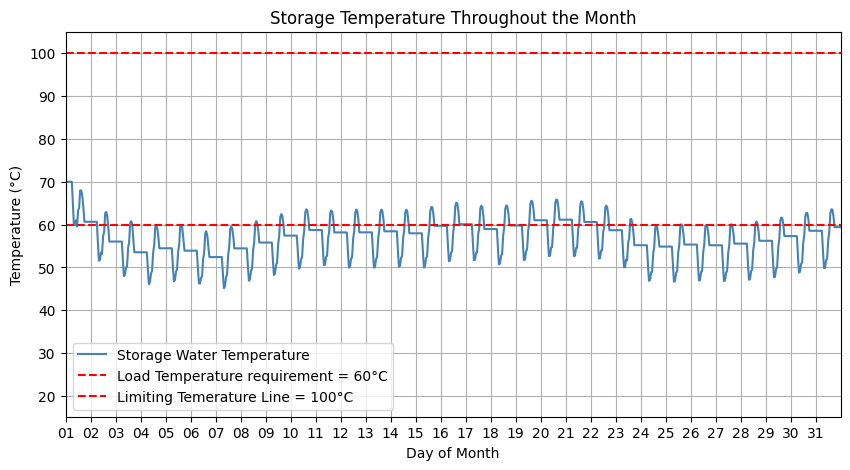

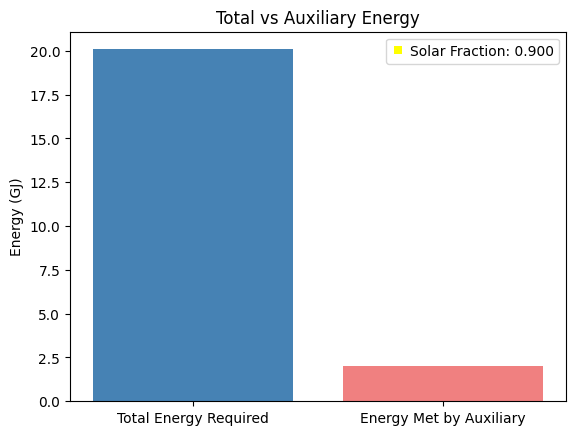

In [5]:
simulation.simulate_month(month=1)

Run simulation for the the entire `year`

Total energy consumed: 218.217 GJ
Auxiliary energy consumed: 52.455 GJ
The solar fraction (F) is: 0.760


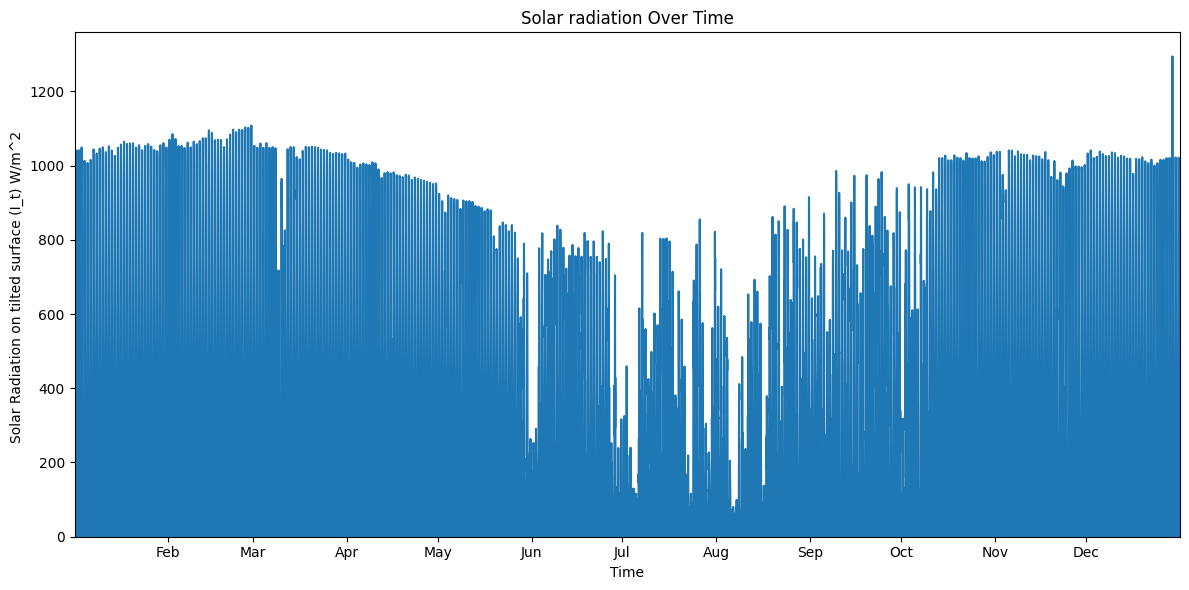

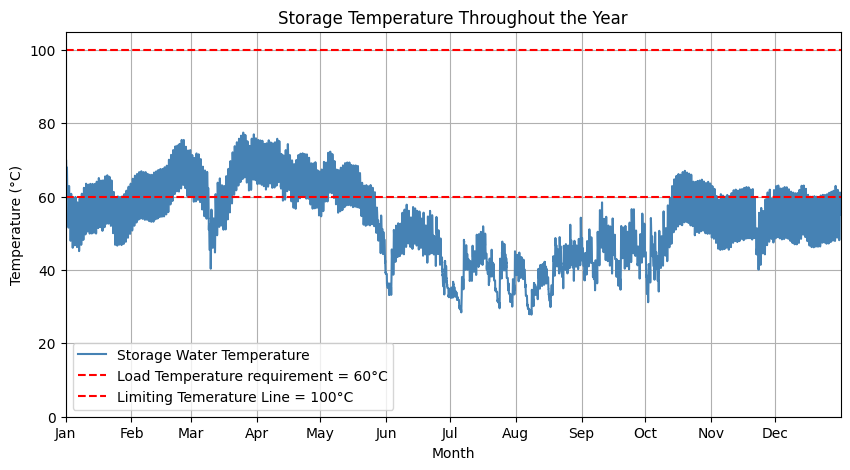

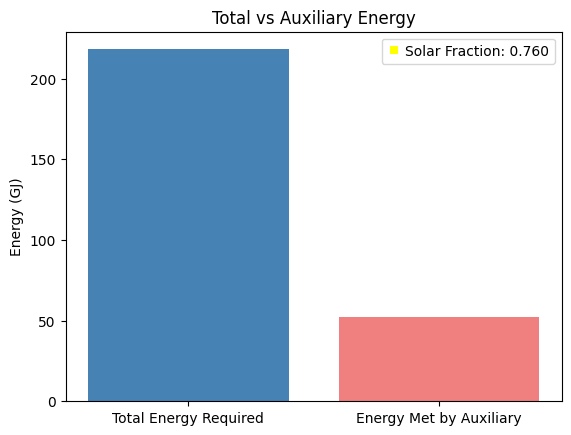

In [6]:
simulation.simulate_entire_year()

From the above simulations, we can infer that the stroage temerature $T_{st}$ is well below the limiting temerature line (100 °C). 
Also, in the month of `April`, when the hourly peak solar radiation is still quite large ($\approx 1000 W/m^2$), $10 \%$ energy is met by the auxiliary heater. 

Anually about $26 \%$ energy is met by the auxiliary heater. 

It implies that we should increase the Solar Collector area ($A_c$).

Lets try increasing the collector area to $100$ and run the simulations again!

In [7]:
simulation.collector_area = 100


Total energy consumed: 218.217 GJ
Auxiliary energy consumed: 22.425 GJ
The solar fraction (F) is: 0.897


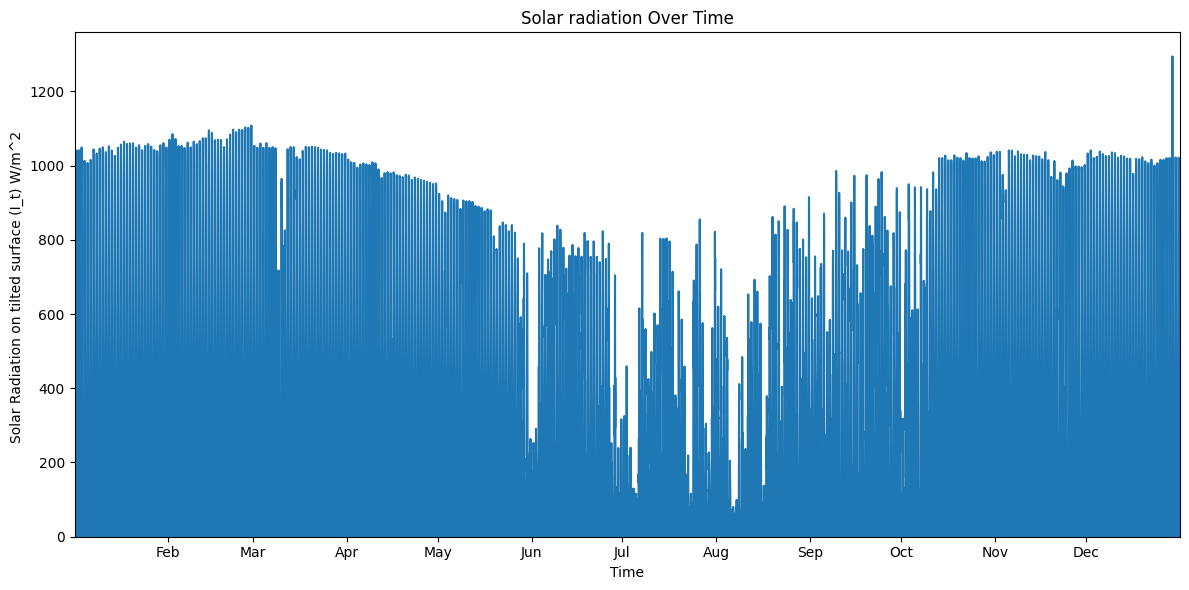

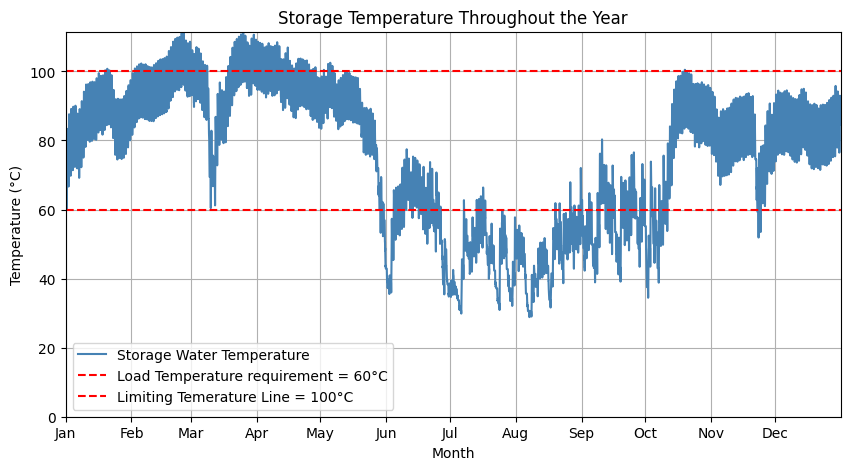

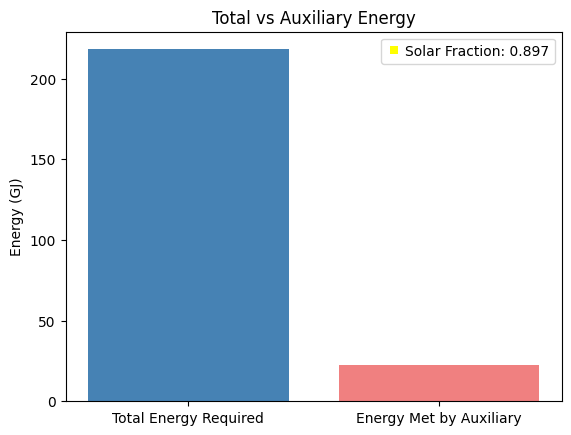

In [8]:
simulation.simulate_entire_year()


With collector area $A_c = 100$, the temerature of water inside the storage tank ($T_{st}$) shoots above $100°C$ during the months of `February` to `May`.


This is an undesirable situation since it will lead to **steam formation** and our system is designed to function only when the temerature of water is below $100 °C$. 


It implies that we must either: 
1. Decrese the collector area
2. Increase the storage tank volume

Let's try decrementing the collector area to $A_c = 70$

In [9]:
simulation.collector_area = 70

Total energy consumed: 218.217 GJ
Auxiliary energy consumed: 33.219 GJ
The solar fraction (F) is: 0.848


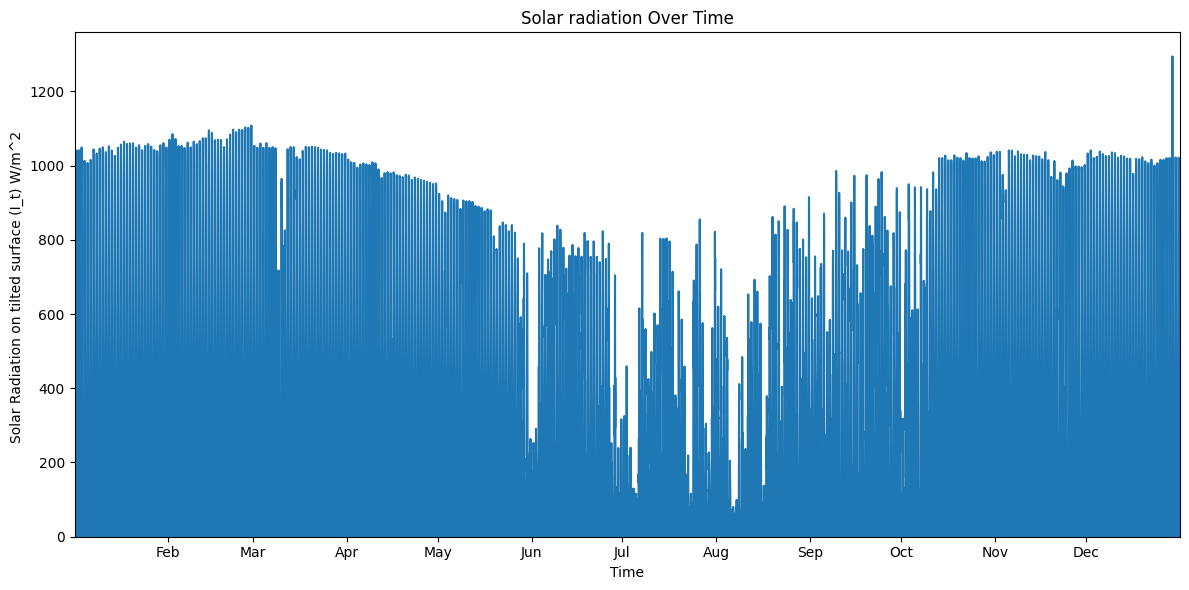

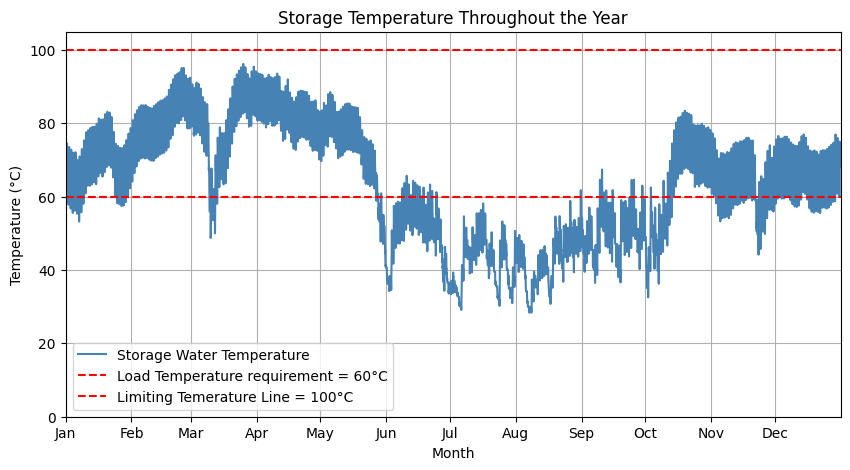

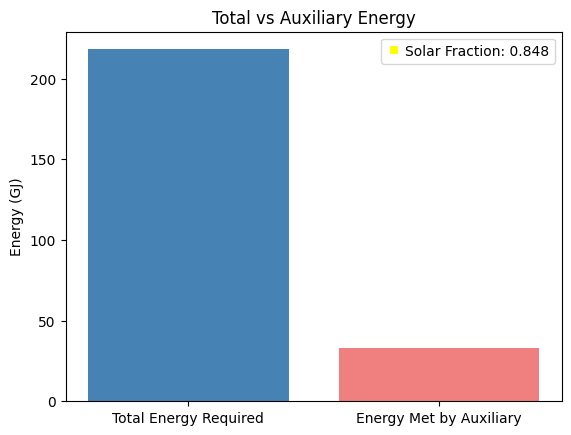

In [10]:
simulation.simulate_entire_year()

The system seems to be in a good shape since the temerature doesn't cross the **Limiting temerature line (100 °C)**. 

To get a better solar fraction ($F$), which is currently $F = 0.848$,

We can try to increase the collector area $A_c = 75$ and also increase the volume of the storake tank $V_{st} = 8 m^3$. 

In [11]:
simulation.collector_area = 75
simulation.storage_tank_volume = 8

Total energy consumed: 218.217 GJ
Auxiliary energy consumed: 30.168 GJ
The solar fraction (F) is: 0.862


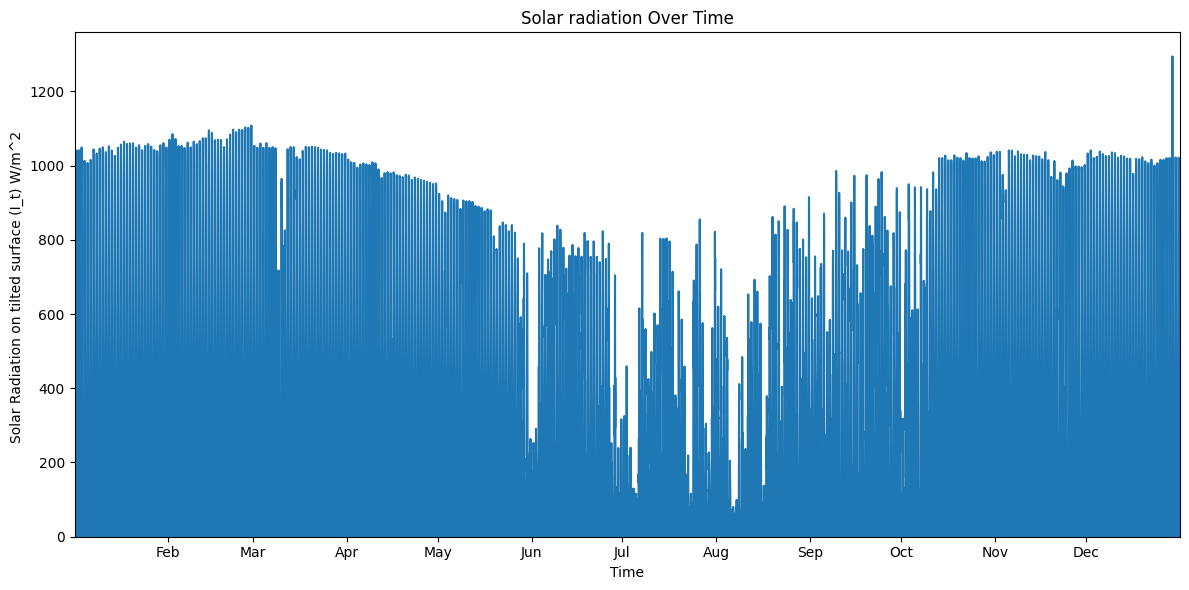

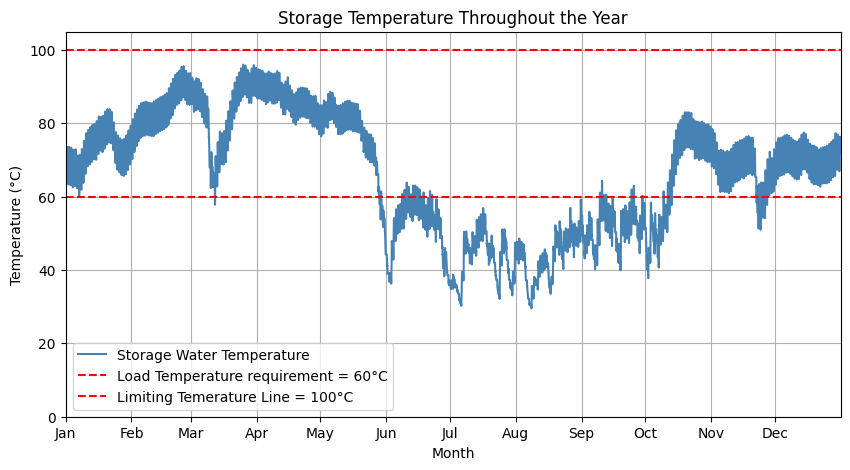

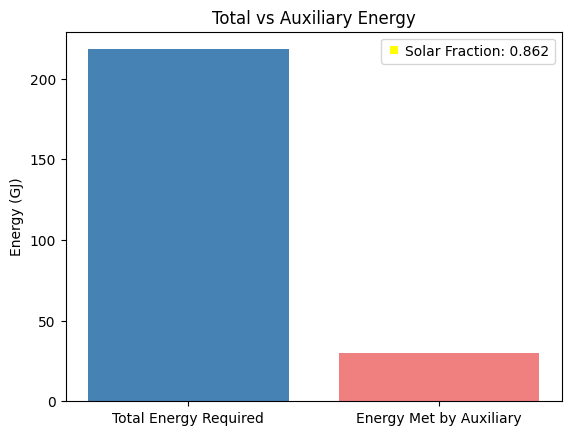

In [12]:
simulation.simulate_entire_year()

Since, the temeperature stays below $100 °C$ throughout the year and we obtain a better solar fraction, $F = 0.862$, this could be a good potential design for an appartment building in `India`, with a requirement of $4500 L/day$ of hot water per day at $60 °C$

Design parameter:
1. Solar collector area $A_c = 75 m^2$
2. Volume of the storage tank $V_{st} = 8 m^3$

Based on this design, we can estimate the costs:
1. Cost of installing the solar panels
2. Cost of the installing the storage water tank 
3. Cost of fuel/electricity the auxiliary heater will require

Calculating these costs are currently beyond the scope of this work and is something I would like to impelment in the future.